# Video: Monte Carlo Simulations

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**General Algorithm of a Monte Carlo Simulation**

As we mentioned in part B of our lecture notebooks on stochastic simulations, at their heart 
Monte Carlo simulations are really rather simple.  We are simply performing (a simulation) 
of a large number of experiments.  These experiments are stochastic, e.g. they can have 
different outcomes and the outcomes are distributed randomly among all the possible
outcomes according to some distribution function.  So, if we run $N$ experiments, and 
observe how many times a particular outcome of interest is observed $M$, we can estimate 
that the probability of that outcome occurring is $\frac{M}{N}$.  

Thats really all there is to it.  Of course, the devil is in the details.  We have 
to know our problem well enough in order to use correct probability distributions for 
our simulated experimental trials.  If we use a normal distribution to represent some 
part of our experimental trials, but in reality the outcomes follow an exponential distribution,
we will get incorrect and nonsensical results.

The general form of a Monte Carlo simulation is as follows:

** A Specific Example, Shared Birthdays in a Group of People**

We gave several examples of Monte Carlo simulations and how they work in the Lecture notebooks.  Lets walk through 
and discuss another example.

Here's a [problem](http://en.wikipedia.org/wiki/Birthday_problem) where the answer is not immediately 
obvious how to calculate analytically.  Lets say you want to know the probability that 
two people will have birthdays on the same day, among a group of people of size G.
How would we determine what that probability might be?  Lets make some simplifying assumptions, we will ignore
leap years and assume a year only has exaclty 365 days.  And we will assume births are equally likely to occur
on any given day of the year (e.g. that births are distributed uniformly).  Neither of these assumptions is
completely correct, but the differences are small enough that we might be able to come up with a reasonable
estimate of the probability even if we assume them.

According to the pseudo-code algorithm given in the previous cell, we first need to figure out
how we will run a simulation of a single experiment/trial.  For our question, a single
experiment would be to gather a group of G people, and determine if any 2 people in the
group share a common birthday (the second part is the analysis).

We will simulate a single experiment by generating a 'birthday' for each of our G individuals in
the group.  A 'birthday' will simply be an integer from 1 to 365, indicating the day of the
year a person was born on.  We are making the assumption that it is equally likely for 
a person to be born on any given day, so we will be using which type of a distribution?


In [2]:
person_birthday = random.randint(1, 365)
print( person_birthday ) 

294


We will have to generate G of these people, and save all of their birthdays in a list, so that we
can perform the second part of our Monte Carlo simuation, analysing the outcome of our trial:

In [3]:
def run_birthday_experiment_trial(G):
    """Create a single trial of our birthday experiment.  Generate G individuals with
    birthdays in the range of 1 to 365
    """
    birthdays = []
    for person in range(G):
        birthdays.append(random.randint(1, 365))
    return birthdays

birthdays = run_birthday_experiment_trial(5)
print( birthdays ) 

[166, 287, 173, 235, 255]


So the previous code represents step 1 of our pseudo code algorithm for a Monte Carlo simulation, this was
how we will simulate a single trial of this experiment.  To analyse the results here, we need to see
if any 2 people among our group of G people have a birthday on the same day.  Take a moment before
proceeding with the video and ask yourself, how would you take the previous list of birthdays and
determine if there is a common shared birthday in the group?

One solution, we could write a function that takes the list of birthdays, and loops/searches 
through them to see if any duplicates  are present:

In [4]:
def group_has_a_common_birthday_v1(group_birthdays):
    """Given a list of birthdays (in range from 1 to 365), find if there are any duplicate
    birthdays within the list.  Here is an example implementation using a nested loop.  
    This function returns True on the first occurrence of finding of a common birthday.  If
    no birthdays are shared by anyone, then this function returns False
    """
    
    for idx1, birthday1 in enumerate(group_birthdays):
        # our inner loop saves a bit of work by only looking at pairs that haven't been examined yet
        for idx2 in range(idx1+1, len(group_birthdays)): 
            # print( idx1, idx2 # if you don't understand how we are looking at and testing pairs, uncomment this ) 
            birthday2 = group_birthdays[idx2]
            # test if this pair of individuals has a common birthday
            if birthday1 == birthday2:
                return True
            
    # if we got to this point, then no pair of individuals had a common birthday, 
    # so answer to question is False
    return False

In [5]:
# lets test our function with the experimental trial from the previous cell
print( group_has_a_common_birthday_v1(birthdays) ) 

# lets try a big group, likely to have a common birthday, see if we get a True result from previous implementation
birthdays = run_birthday_experiment_trial(100)
print( birthdays ) 
print( group_has_a_common_birthday_v1(birthdays) ) 

False
[262, 186, 15, 216, 165, 147, 187, 85, 299, 140, 275, 295, 246, 127, 238, 181, 96, 146, 273, 290, 308, 356, 59, 287, 205, 294, 339, 111, 20, 351, 141, 44, 231, 167, 69, 186, 150, 352, 180, 333, 160, 352, 111, 363, 353, 82, 282, 112, 178, 9, 188, 241, 98, 1, 307, 142, 34, 94, 285, 331, 193, 304, 59, 42, 170, 11, 128, 73, 257, 53, 266, 28, 2, 234, 102, 332, 240, 3, 191, 291, 15, 25, 202, 324, 100, 267, 296, 44, 131, 127, 71, 71, 167, 122, 139, 225, 327, 208, 153, 14]
True


Of course, the previous cell could happen to be True for the first test, if the 5 people we 
created just happened to have a common birthday.  And it could happen to be False for the 
second test with 100 people, but try running many times.  You may be surprised to find how 
often the answer is True for a group of 100 people.

**An Aside**

This being Python, the previous function can be done many ways, and at a much higher level 
conceptually.  For example, whenever I have a list of 2 or more items, and I need to create 
all unique combinations of the items to run an experiment or test on them, I immediately think
of and reach for the itertools library.  The itertools library contains a function
called combinations, which will return all (unordered) combinations of
the itmes in a list.  For example:

In [6]:
from itertools import combinations
birthdays = run_birthday_experiment_trial(5)
print( birthdays ) 
for birthday1, birthday2 in combinations(birthdays, 2):
    print( birthday1, birthday2 ) 

[335, 30, 8, 345, 42]
(335, 30)
(335, 8)
(335, 345)
(335, 42)
(30, 8)
(30, 345)
(30, 42)
(8, 345)
(8, 42)
(345, 42)


Thus, we could write the previous function using combinations instead of a nested loop, like this:

In [7]:
def group_has_a_common_birthday_v2(group_birthdays):
    """Given a list of birthdays (in range from 1 to 365), find if there are any duplicate
    birthdays within the list.  Here is an example implementation using the itertools library.  
    This function returns True on the first occurrence we find of a common birthday.  If
    no birthdays are shared by anyone, then this function returns False
    """
    
    for birthday1, birthday2 in combinations(birthdays, 2):
        # test if this pair of individuals has a common birthday
        if birthday1 == birthday2:
            return True
            
    # if we got to this point, then no pair of individuals had a common birthday, 
    # so answer to question is False
    return False

In [8]:
print( group_has_a_common_birthday_v2(birthdays) ) 

False


But to me, there is an even higher level concept that more exactly captures the test we are 
performing.  We want to know, are all of the birthdays in the group unique or not?  
We can use the unique function from the NumPy library, or regular python sets, to test this.
Here we use unique to determine the unique birthdays, then see if the list of unique
birthdays is still the same size as the original list of birthdays.

In [9]:
def group_has_a_common_birthday_v3(group_birthdays):
    """Given a list of birthdays (in range from 1 to 365), find if there are any duplicate
    birthdays within the list.  Here is an example implementation using the concept
    of uniqueness.  A group doesn't have a common birthday if the list of unique birthdays is
    still the same size as the original list.  If the list of unique birthdays
    is smaller than the original group size, there must be one or more shared
    birthdays.
    """
    
    # if the list of unique birthdays is still the same size as the original list
    # then they are all uniques
    if len(np.unique(group_birthdays)) == len(group_birthdays):
        return False
    else:
        return True

Or, since the test of if statement is already a boolean, we can just simply do this

In [10]:
def group_has_a_common_birthday_v4(group_birthdays):
    """Given a list of birthdays (in range from 1 to 365), find if there are any duplicate
    birthdays within the list.  Here is a 1 liner using the NumPy unique function to 
    conceptually ask, are all birthdays unique, if not then 1 or more are shared.
    """
    return len(np.unique(group_birthdays)) != len(group_birthdays)


In [11]:
print( group_has_a_common_birthday_v4(birthdays) ) 

False


The previous 4 versions of our test of the experiment outcome should all provide equivalent answers to our
question of does a common birthday exist among the group or not.  The previous functions were a bit of an
aside, but for me being familiar with Python, my first thought about what we were trying to do was
to determine if the birthdays were unique or not, knowing that there are functions that test for
uniqueness of the values in a list or array in Python.

** Back to Monte Carlo Simulation **

After that bit of an aside, lets put the previous 2 functions together, and actually make the Monte Carlo
simulation we set out to build:

In [12]:
N = 1000 # run 1000 experiments
G = 10 # we will ask the question: among a group of 5 individuals, what is the probability of a common birthday
M = 0 # our results

for exp in range(N):
    group_birthdays = run_birthday_experiment_trial(G)
    if group_has_a_common_birthday_v4(group_birthdays):
        M = M + 1

p = float(M) / float(N)
print( "The probability of a group of size %d having a common birthday is %f" % (G, p) ) 

The probability of a group of size 10 having a common birthday is 0.115000


You will see quite a bit of variation if you run the previous with only 1000 trials, but 
if you try about 100,000 trials, you will see that the probability appears to be something 
like 0.027, or approaching 3%.  Does this seem high  to you? We are saying that almost 3% 
of the time, a group of 5 people will happen to have 2 (or more) people that share a common birthday.

Lets see what the probability looks like for a group size of 10 people.  Since we want to perform the
previous Monte Carlo simulation multiple times, varying the group size G, lets encapsulate that bit of
code into a function:

In [13]:
def group_birthdays_simulation(G, N=1000):
    """Perform the experiment to find probability of a group of people of size G having
    at least 1 shared birthday.  We return a probability, p, giving our empirical
    result of the observed proportion of groups with shared birthdays.
    """
    M = 0
    for exp in range(N):
        group_birthdays = run_birthday_experiment_trial(G)
        if group_has_a_common_birthday_v4(group_birthdays):
            M = M + 1
    
    p = float(M) / float(N)
    return p

N = 10000
G = 20
p = group_birthdays_simulation(G,N)
print( "The probability of a group of size %d having a common birthday is %f" % (G, p) ) 

The probability of a group of size 20 having a common birthday is 0.415400


I get an empirical result of about 0.118, or close to 12% of the time, for a group of size 10 to have a shared
birthday.  So over 1 group in 10 where there are 10 or more people ought to have a pair that share
a common birthday (assuming our initial assumptions are correct).

This brings up a second question.  What size of a group might we need before we expect that there is at least
1 shared birthday among the group?  We can interpret this to mean, at what group size will the
probability exceed 50% of a shared birthday occurring.  

We can use our previous group_birthdays_simulation() function to explore this question.  However, 
we are now trying to answer a slightly different, more complex question, 
though we are still basiclly  doing a type of Monte Carlo simulation.  But in this
case, we want to know, in general, how the probability changes as a function of G, 
the size of the groups.  So what we need to do is run Monte Carlo simulations 
for group sizes from say, 1 to 75, and see what the probability is in each case.

Lets see what we get:

In [14]:
N = 1000
group_sizes = range(1,76) # group sizes is a list from 1 to 75
probs = [] # a list to hold the probabilities for group sizes from 1 to 75

for g in group_sizes: 
    probs.append(group_birthdays_simulation(g, N))
    


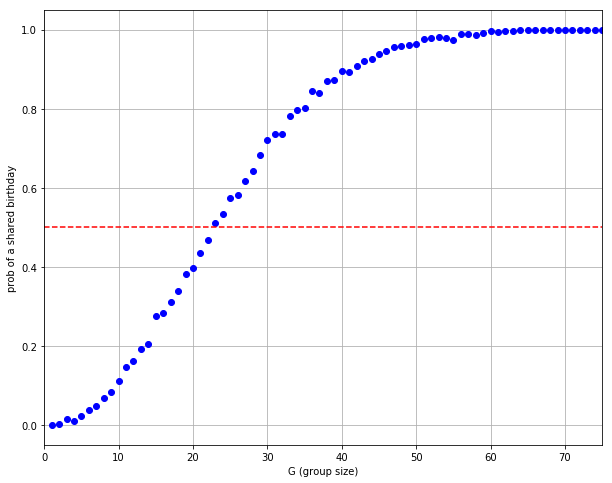

In [15]:
# lets plot the results, so we can better visualize the shape of our function
plt.figure(figsize=(10,8))
plt.plot(group_sizes, probs, 'bo')

# plot a red dashed line at prob=0.5
plt.plot([0, 75], [0.5, 0.5], 'r--')
plt.xlim(0, 75)

# add grids and labels, so people can better read the graph
plt.grid()
plt.xlabel('G (group size)')
plt.ylabel('prob of a shared birthday')


The previous figure shows that the probability crosses the 0.5 threshold around group sizes of
22 to 24 individuals.    Therefore we expect that in group of 24 or more people will likely
contain at least one pair of people hat have a birthday on the same day.  Further, it shows that 
for a group size of only 55 or more we are almost certain to have a shared birthday in the group.

There is one further refinement that would usually be a good idea to make in the previous
set of computational experiments, if we were really going to present or discuss the findings
with others.  Often for such experiments, we want to know how certain we are of the
accuracy of the results.  I can tell from the relatively smooth shape of the individual
experiment points that our accurracy is fairly good in the above figure.  If we saw the
points make big vertical jumps from one group size to the other, we might not be so certain.
But lets measure the variance (the standard deviation) explicitly and plot 
variance as error bars on our figure to visually represent the accuracy we are getting. When you 
plot error bars, you are giving the viewer some indication of what the variation 
or error was in the observed measurement.  If you ever need to plot error bars for 
a professional publication or presentation, I recommend you read somthing like [this](http://ww1.cpa-apc.org:8080/publications/archives/PDF/1996/Oct/strein2.pdf), to make sure you fully 
understand what is going on.

We will modify our previous experiment to perform 20 simulations for each group size.  From
the sample of 20 probabilities for each group size, we can estimate the mean p, and the
variance we are observing for each p.  We will then plot the variance we recorded as
error bars on our points, to visually get a feel for how much noise/error we have in the
system we are modeling.

In [16]:
N = 10 # and we reduce down to experiments of size 10, which will increase our error/variance quite a bit
num_sims = 20
group_sizes = range(1,76) # group sizes is a list from 1 to 75
averages = [] # a list to hold the average probability we observe for each group size 
variances = [] # a list to hold the variances/standard deviations we measure

for g in group_sizes:
    print( "Group size:",g,":", ) 
    probs = []
    for sim in range(num_sims):
        print( sim, ) 
        probs.append(group_birthdays_simulation(g, N))
    averages.append(np.mean(probs)) # the mean or average of our num_sims simulations for group size g
    variances.append(np.std(probs)) # the standard deviation, or variance, of the simulations
    print( "" ) 

('Group size:', 1, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 2, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 3, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 4, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 5, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 6, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 7, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 8, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(

(18,)
(19,)

('Group size:', 66, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 67, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 68, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 69, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 70, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 71, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 72, ':')
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)

('Group size:', 73, ':')
(0,)
(1,)


(0, 75)

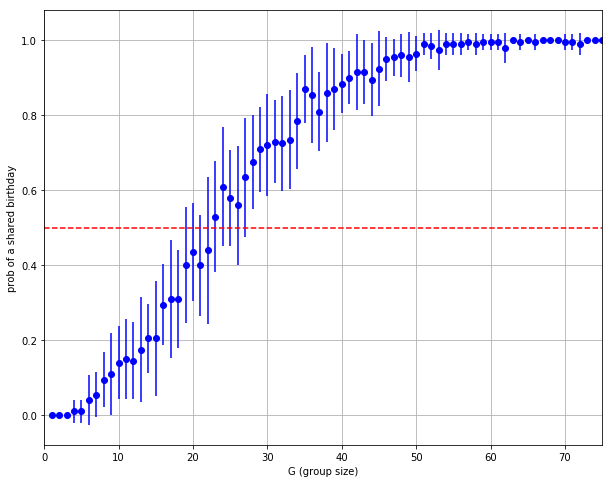

In [17]:
# lets plot the results, so we can better visualize the shape of our function
plt.figure(figsize=(10,8))

# plot errorbars
plt.errorbar(group_sizes, averages, yerr=variances, fmt='bo')

plt.grid()
plt.xlabel('G (group size)')
plt.ylabel('prob of a shared birthday')

# plot a red dashed line at prob=0.5
plt.plot([0, 75], [0.5, 0.5], 'r--')
plt.xlim(0, 75)

As you can see, the error/variance is smaller when we are close to 0 and 1, but becomes
larger when we are in the middle probabilities.

The previous figure is probably a bit too crowded.  We probably only need the error/variance 
about every 5 points or so to make the point.  Lets select only every 5th point for 
displaying the error/variance:

(0, 75)

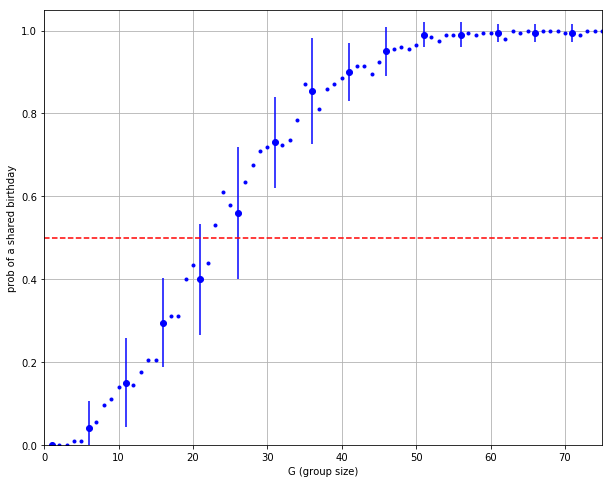

In [18]:
# lets plot the results, so we can better visualize the shape of our function
plt.figure(figsize=(10,8))

# plot errorbars
plt.plot(group_sizes, averages, 'bo', markersize=3.0, alpha=1.0)
plt.errorbar(group_sizes[::5], averages[::5], yerr=variances[::5], fmt='bo')

plt.grid()
plt.xlabel('G (group size)')
plt.ylabel('prob of a shared birthday')

# plot a red dashed line at prob=0.5
plt.plot([0, 75], [0.5, 0.5], 'r--')
plt.ylim(0.0, 1.05)
plt.xlim(0, 75)

The previous 2 figures give you the idea on using error bars, and how to interpret them.  You might want to try running
the previous simulation with larger experiment sizes, to see how the variance/error is effected.

** Some More about Accuracy of Monte Carlo Simulations **

Lets return to the discussion about the accuracy of a Monte Carlo Simulation.  One important 
assumption we have been making, that is fortunately  true, is that we will tend to converge 
towards the true answer as we run more  and more simulations.  The reason this is true is 
related to the central limit theorem  that we briefly discussed in the previous video, 
or at least has a similar reason.  When we  investigate the average of many many many random 
processes, the fluctuation/error/noise on either side of the true answer tend to cancel each 
other out (e.g. an average is performing a sum on the trials).  The more such trials we run, 
the more we will be able to differentiate between noise in the system, and the true signal 
of the answer or problem under investigation.  Or as the central limit theorm shows,
the more trials we run, the greater the probability that our sum/average will accuractly
reflect the true sum/average of the process.

Accuracy in a Monte Carlo simulation is always going to be a function of the number of
experiments/trials we perform.  The larger the size of $N$, the more accurate we
expect our simulation to be. Of course, the larter the size of $N$, the more
costly it is to run our simulation, it takes more time and memory resources
to run it.  Therefore, another aspect of computational modeling is determining how
accurate our results are, and what we need to do in order to get a desired/required
accuracy from the simulation.

Lets redo the analysis we did in Lecture 7 part A, but using our Birthday problem.  For 
example, the analytical actual probability for a group of 23 people can be shown to be 
$0.507297$ (this is the actual first group size that is above a 50% probability of containing 
a common birthday in the group).  Lets look at the accuracy of our Monte Carlo estimate 
for a group size of 23, as we vary the size $N$ of the experiments we perform.


In [19]:
group_size = 23 # The group size we are investigating
actual_prob = 0.507297 # actual analytical probability of shared birthday for group size 23

# try experiment/trial sizes from 10 to 1000
N_sizes=[10, 20, 50, 100, 200, 500, 1000]
num_N = len(N_sizes)
# run 50 of each size N, to determine the accuracy we are seeing
num_sims = 50 

# we need to save actual simulation results for later analysis
# we use a numpy array with 1 row for each N value we test, and
# 50 columns to hold the result for each of our 50 sims for a given N
sim_results = np.empty( (num_N, num_sims) )

for nix, N in enumerate(N_sizes):
    print( "N size:", N, ":", ) 
    probs = []
    for sim in range(num_sims):
        print( sim+1, ) 
        sim_results[nix, sim] = group_birthdays_simulation(group_size, N)
    print( "" ) 
    

('N size:', 10, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(33,)
(34,)
(35,)
(36,)
(37,)
(38,)
(39,)
(40,)
(41,)
(42,)
(43,)
(44,)
(45,)
(46,)
(47,)
(48,)
(49,)
(50,)

('N size:', 20, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(33,)
(34,)
(35,)
(36,)
(37,)
(38,)
(39,)
(40,)
(41,)
(42,)
(43,)
(44,)
(45,)
(46,)
(47,)
(48,)
(49,)
(50,)

('N size:', 50, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(33,)
(34,)
(35,)
(36,)
(37,)
(38,)
(39,)
(40,)
(41,)
(42,)
(43,)
(44,)
(45,)
(46,)
(47,)
(48,)
(49,)
(50,)

('N size:', 100, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)

Lets first simply plot the average for each N simulation size, using the variance to plot error bars.

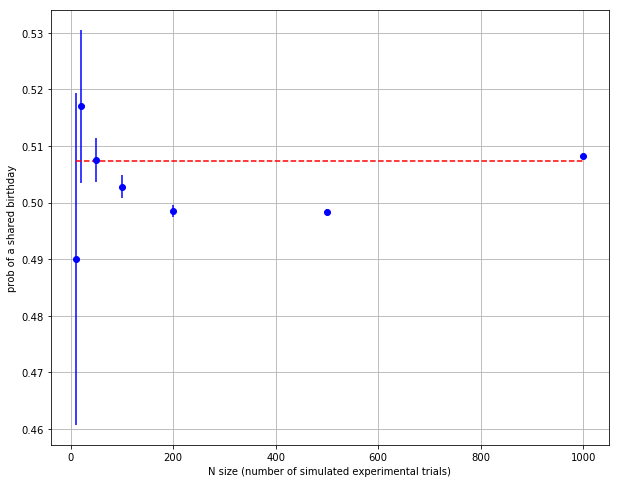

In [20]:
averages = sim_results.mean(axis=1)
variances = sim_results.var(axis=1)

# visualize the results
plt.figure(figsize=(10,8))

# plot data using standard deviations for error bars
plt.errorbar(N_sizes, averages, yerr=variances, fmt='bo')

# plot a red dashed line at the actual probability
plt.plot([min(N_sizes), max(N_sizes)], [actual_prob, actual_prob], 'r--')

# grids and labels
plt.grid()
plt.xlabel('N size (number of simulated experimental trials)')
plt.ylabel('prob of a shared birthday')


I chose the sizes of N to test in the previous example because it normally takes about twice as meany
experiments in order to double the accuracy.  So to see an increase in accuracy (e.g. a decrease 
in the variance), we usually will need to double the number of trials.  So to get 3 times
the accuracy, we don't need 3 times as many trials, but $2^3$ or 8 times as many.  Thus this is
an exponential relationship, accuracy is increasing as a power of the number of trials.  

As you can see in the previous plot, in practical terms when we have values from an exponential
function, we need to use logarithmic scaled axis to better see and understand the results.  The
previous plot will look better and be more understandable if we scale our x axis using
a logarithmic scale.


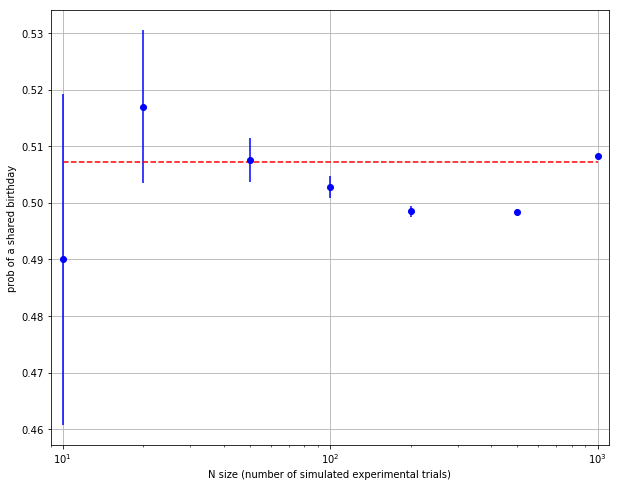

In [21]:
averages = sim_results.mean(axis=1)
variances = sim_results.var(axis=1)

# visualize the results
plt.figure(figsize=(10,8))

# plot data using standard deviations for error bars
plt.errorbar(N_sizes, averages, yerr=variances, fmt='bo')

# plot a red dashed line at the actual probability
plt.plot([min(N_sizes), max(N_sizes)], [actual_prob, actual_prob], 'r--')

# grids and labels for readibility
plt.grid()
plt.xlabel('N size (number of simulated experimental trials)')
plt.ylabel('prob of a shared birthday')
plt.xlim(9, 10**3+100)
plt.xscale('log')

As you should see, the variance is reducing greatly as the size N of our number of trials increases.  The
error bars are not visible for the upper range of our N values.

The standard deviation really only plots about a 66% confidence interval.  That is to say, when we plot
plus or minus the standard deviation as error bars, we expect that 66% of the time the true mean
will be between the error bars.  But often in the physical sciences, we are required to report
results showing 95% or 99% confidence (or even more in some disciplines, like Physics). 
As a quick and dirty estimate, we can multiply our variance by 2.58, to get an estimate of
a 99% confidence interval.  What that means in this context is that we believe with 99%
probability that the true mean of the phenomenon we are studying experimentally should like
somewhere within the lower and upper bounds of our error bars.

 Lets redo the above figure with 99% CI:

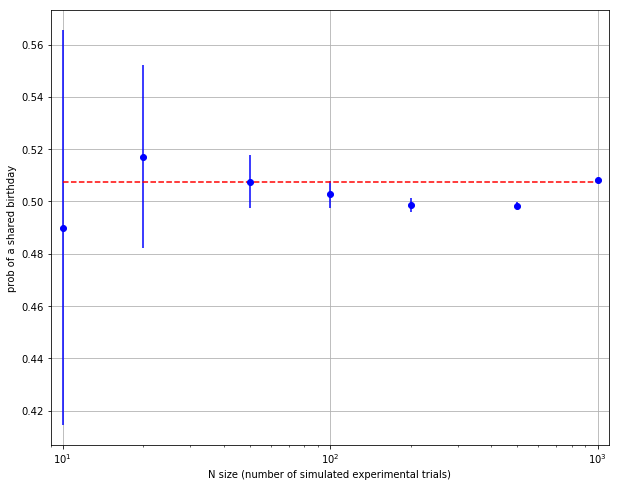

In [22]:
averages = sim_results.mean(axis=1)
ci = sim_results.var(axis=1) * 2.58 # 99% confidence interval

# visualize the results
plt.figure(figsize=(10,8))

# plot data using standard deviations for error bars
plt.errorbar(N_sizes, averages, yerr=ci, fmt='bo')

# plot a red dashed line at the actual probability
plt.plot([min(N_sizes), max(N_sizes)], [actual_prob, actual_prob], 'r--')

# grids and labels for readibility
plt.grid()
plt.xlabel('N size (number of simulated experimental trials)')
plt.ylabel('prob of a shared birthday')
plt.xlim(9, 10**3+100)
plt.xscale('log')

What you should usually see is that most of our points (hopefully 99% of them) end up now with error bars
that encompass the true probability we are plotting as the red dashed line. 

** Actual Variance **

Instead of plotting our variance or confidence interval using the calculated variance, 
lets just plot all of the actual values so we can see the actual spread we are getting in
estimating the probability p in our experimental trials.  Here instead of plotting the 
average value for each N, along with error bars, we simply plot all of the actual
p probabilities we obtained for each N value.  We use a bit of alpha to make points
transparent, so you can better visualize the density of points around the true mean:

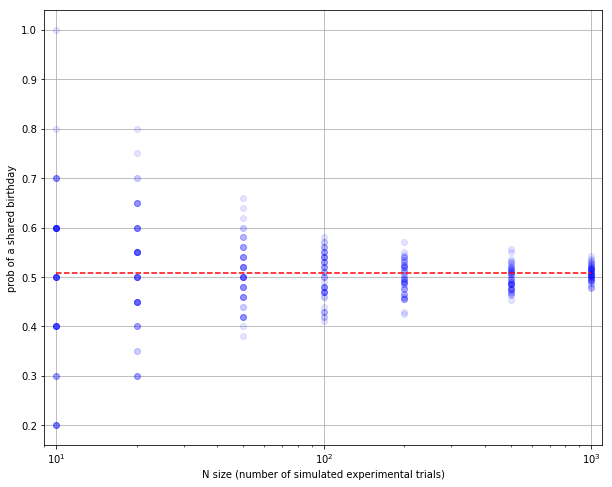

In [23]:
# visualize the results
plt.figure(figsize=(10,8))

# plot data using standard deviations for error bars
x = np.array(N_sizes).reshape(7,1).repeat(50).reshape(7,50)
plt.plot(x.flatten(), sim_results.flatten(), 'bo', alpha=0.1)

# plot a red dashed line at the actual probability
plt.plot([min(N_sizes), max(N_sizes)], [actual_prob, actual_prob], 'r--')

# grids and labels
plt.grid()
plt.xlabel('N size (number of simulated experimental trials)')
plt.ylabel('prob of a shared birthday')
plt.xlim(9, 10**3+100)
plt.xscale('log')

This is really the same information as in the last plots, but you may be able to get a better feel for
what is actually happenning if you look at all of the results our experimental trials are returning like
this.  Here you will see that for $N=10$ we can only have an accuracy to $\frac{1}{10}$ or 1 decimal place.
And thus, all of our results are some multiple of $0.1$.  As we increase the size of $N$, the number
of decimal places that we can estimate increases accordingly.  Further, the lower and upper
bounds of values become much less likely for any 1 given experimental trial to be far
away from the true mean.  So as $N$ increases, the upper/lower bounds converges towards
the true value.

As I mentioned in the lecture notebooks, if you repeat the above experiment for large values of $N$, say
for values ranging from 1000 ($10^3$) up to 100,000 ($10^5$), you will see a pretty much exact repeat
of this previous figure.  The only difference will be the range of the variation/error that you
start and end with.

Lets look at the results from $10^3$ to $10^5$

In [24]:
group_size = 23 # The group size we are investigating
actual_prob = 0.507297

N_sizes=[1000, 2000, 5000, 10000, 20000, 50000, 100000]
num_N = len(N_sizes)
num_sims = 10 # run number of sim

# we need to save actual simulation results for later analysis
sim_results = np.empty( (num_N, num_sims) )

for nix, N in enumerate(N_sizes):
    print( "N size:", N, ":", ) 
    probs = []
    for sim in range(num_sims):
        print( sim+1, ) 
        sim_results[nix, sim] = group_birthdays_simulation(group_size, N)
    print( "" ) 
    

('N size:', 1000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)

('N size:', 2000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)

('N size:', 5000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)

('N size:', 10000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)

('N size:', 20000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)

('N size:', 50000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)

('N size:', 100000, ':')
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)



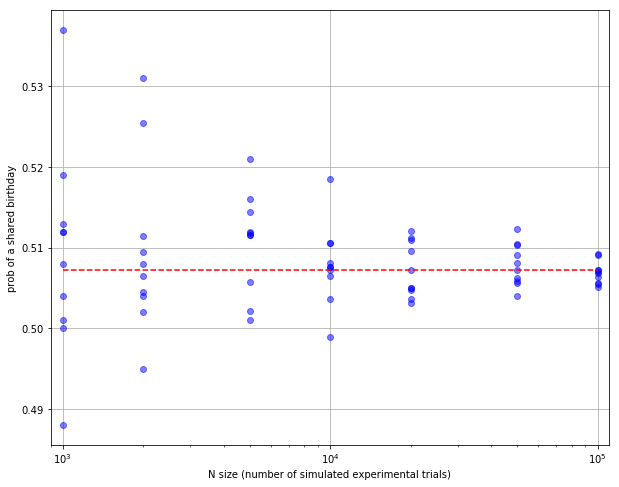

In [25]:
# visualize the results
plt.figure(figsize=(10,8))

# plot data using standard deviations for error bars
x = np.array(N_sizes).reshape(7,1).repeat(10).reshape(7,10)
plt.plot(x.flatten(), sim_results.flatten(), 'bo', alpha=0.5)

# plot a red dashed line at the actual probability
plt.plot([min(N_sizes), max(N_sizes)], [actual_prob, actual_prob], 'r--')

# grids and labels
plt.grid()
plt.xlabel('N size (number of simulated experimental trials)')
plt.ylabel('prob of a shared birthday')
plt.xlim(900, 10**5+10000)
plt.xscale('log')

Admittedly there will be a few visual difference between this and the previous figure, but 
most of these differences occur in this case because we only ran 10 instead of 50 simulations
for this second figure.  If we took the time to run 50, we would see an even more similar figure
as before.

The difference will be, that in the first figure the values range from 0.1 to 0.9 (80% of the space). 
For this figure, values range from 0.46 to 0.54, about 8% of the space.